<a href="https://colab.research.google.com/github/paddy3696/CNN_Pytorch/blob/main/CNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_gpu = torch.cuda.is_available()

if not train_gpu:
    print('CUDA is not available. Training on CPU')
else:
    print('CUDA is available! Training on GPU')

CUDA is available! Training on GPU


In [4]:
data_dir = '/content/drive/MyDrive/MSIITM/Courses/DL/assignment2/inaturalist_12K'

train_transforms = transforms.Compose([transforms.RandomRotation(30),transforms.RandomResizedCrop(224),transforms.RandomHorizontalFlip(),transforms.ToTensor()])
                                
test_transforms = transforms.Compose([transforms.Resize(255),transforms.CenterCrop(224),transforms.ToTensor()])
                                      
train_data = datasets.ImageFolder(data_dir + '/train',transform=train_transforms)                                       

test_data = datasets.ImageFolder(data_dir + '/val', transform=test_transforms)

#Data Loading

trainloader = torch.utils.data.DataLoader(train_data,batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [5]:
# https://github.com/udacity/DL_PyTorch/blob/master/helper.py#L42
def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


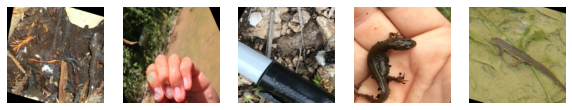

In [9]:
data_iter = iter(trainloader)

imgs, labels = next(data_iter)
fig, axs = plt.subplots(figsize=(10,4), ncols = 5)
for i in range(5):
    ax = axs[i]
    print(imgs.shape)
    imshow(imgs[i],ax=ax, normalize = False)